# Báo cáo: Hiệu suất Chiến dịch Marketing



## Mô tả Dataset:
Dataset về Hiệu suất Chiến dịch Marketing cung cấp những thông tin quan trọng về hiệu quả của các chiến dịch marketing khác nhau. Dataset này ghi lại các chỉ số hiệu suất, đối tượng mục tiêu, thời gian, kênh sử dụng, và các yếu tố thiết yếu khác góp phần vào thành công của các chiến dịch. Với 200.000 dòng dữ liệu độc nhất trải dài trong hai năm, dataset này mang lại cái nhìn toàn diện về hiệu suất chiến dịch trên nhiều công ty và phân khúc khách hàng.

## Các cột trong Dataset:
1. **Company**: Công ty chịu trách nhiệm thực hiện chiến dịch, bao gồm các thương hiệu giả định.
2. **Campaign_Type**: Loại chiến dịch được sử dụng, bao gồm email, mạng xã hội, influencer, quảng cáo hiển thị, hoặc tìm kiếm.
3. **Target_Audience**: Phân khúc đối tượng mục tiêu của chiến dịch, ví dụ: phụ nữ từ 25-34 tuổi, nam giới từ 18-24 tuổi, hoặc tất cả nhóm tuổi.
4. **Duration**: Thời gian diễn ra chiến dịch, tính bằng ngày.
5. **Channels_Used**: Các kênh được sử dụng để quảng bá chiến dịch, bao gồm email, nền tảng mạng xã hội, YouTube, website, hoặc Google Ads.
6. **Conversion_Rate**: Tỷ lệ chuyển đổi từ lượt xem hoặc lượt tiếp cận thành hành động mong muốn, thể hiện hiệu quả của chiến dịch.
7. **Acquisition_Cost**: Chi phí mà công ty phải bỏ ra để thu hút khách hàng, được trình bày dưới dạng giá trị tiền tệ.
8. **ROI**: Lợi tức đầu tư, thể hiện mức độ lợi nhuận và thành công của chiến dịch.
9. **Location**: Địa điểm địa lý nơi chiến dịch được thực hiện, bao gồm các thành phố lớn như New York, Los Angeles, Chicago, Houston, hoặc Miami.
10. **Language**: Ngôn ngữ được sử dụng trong nội dung chiến dịch, bao gồm tiếng Anh, Tây Ban Nha, Pháp, Đức, hoặc Trung Quốc.
11. **Clicks**: Số lượt nhấp chuột mà chiến dịch tạo ra, thể hiện mức độ tương tác của người dùng.
12. **Impressions**: Tổng số lần chiến dịch được hiển thị hoặc xem bởi đối tượng mục tiêu (Số lần nội dung quảng cáo được hiển thị trên màn hình của người dùng, mặc kệ người dùng có click hay không)
13. **Engagement_Score**: Điểm số từ 1 đến 10 đo lường mức độ tương tác mà chiến dịch tạo ra.
14. **Customer_Segment**: Phân khúc khách hàng hoặc nhóm đối tượng mà chiến dịch hướng đến, ví dụ: người yêu công nghệ, tín đồ thời trang, người quan tâm đến sức khỏe, người yêu ẩm thực, hoặc người thích hoạt động ngoài trời.
15. **Date**: Ngày diễn ra chiến dịch, cung cấp góc nhìn theo thời gian để phân tích xu hướng và mô hình.

## Phạm vi ứng dụng:
Bằng cách sử dụng dataset này, các nhà tiếp thị và nhà phân tích dữ liệu có thể khám phá những thông tin giá trị về hiệu suất chiến dịch, sở thích của đối tượng mục tiêu, hiệu quả của kênh, và ROI. Dataset này là một nguồn tài nguyên quý giá cho nghiên cứu thị trường, tối ưu hóa chiến dịch, và ra quyết định dựa trên dữ liệu, giúp doanh nghiệp cải thiện chiến lược marketing và thúc đẩy tăng trưởng có mục

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [152]:
# Download latest version
path = kagglehub.dataset_download("manishabhatt22/marketing-campaign-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\manishabhatt22\marketing-campaign-performance-dataset\versions\1


In [153]:
df = pd.read_csv(path + "/marketing_campaign_dataset.csv")
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


## Tiền xử lý dữ liệu

In [154]:
# Dựa vào info để tôi kiểm tra xem những cột nào null và kiểu dữ liệu tương ứng của từng cột
# Bằng cách này, ta có thể nhanh chóng kiểm chứng xem có cột nào bị lẫn dữ liệu không tốt không
# VD: Nếu cột ID ta biết là giá trị int rồi mà khi dùng df.info() lại cho kết quả là object thì
# chứng tỏ tồn tại 1 giá trị nào đó khôn hợp lệ trong đó

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [156]:
# Ta xây dựng một hàm in ra các unique value cho từng cột
def unique_values(df):
    for column in df.columns:
        print("************** Unique values of column", column, "**************")
        print(df[column].unique())
        print()

In [157]:
unique_values(df)

************** Unique values of column Campaign_ID **************
[     1      2      3 ... 199998 199999 200000]

************** Unique values of column Company **************
['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']

************** Unique values of column Campaign_Type **************
['Email' 'Influencer' 'Display' 'Search' 'Social Media']

************** Unique values of column Target_Audience **************
['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']

************** Unique values of column Duration **************
['30 days' '60 days' '15 days' '45 days']

************** Unique values of column Channel_Used **************
['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']

************** Unique values of column Conversion_Rate **************
[0.04 0.12 0.07 0.11 0.05 0.13 0.08 0.09 0.14 0.02 0.06 0.01 0.03 0.1
 0.15]

************** Unique values of column Acquisition_Cost **************
['$16,1

Dữ liệu đã tương đối sạch, tuy nhiên tôi sẽ biến đổi một vài cột cho mục đích phân tích

In [158]:
# Xử lý cho cột Target_Audience	
# Cột này tôi sẽ tách thành 2 cột: Sex và Age_Group
# Sex: mang 3 giá trị: Men - Women - Both
# Age_Group: 18-24, ..., All 

In [159]:
target_audience = df["Target_Audience"].apply(lambda x: x.split())

df["Sex"] = target_audience.apply(lambda x: x[0] if x[0] != "All" else "Both")
df["Age_Group"] = target_audience.apply(lambda x: x[1] if x[1] != "Ages" else "All Ages")
df.drop(columns=["Target_Audience"], inplace=True)

In [160]:
df.head()

,Campaign_ID,Company,Campaign_Type,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Sex,Age_Group
0,1,Innovate Industries,Email,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,Men,18-24
1,2,NexGen Systems,Email,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,Women,35-44
2,3,Alpha Innovations,Influencer,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,Men,25-34
3,4,DataTech Solutions,Display,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,Both,All Ages
4,5,NexGen Systems,Email,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,Men,25-34


In [161]:
df["Acquisition_Cost"] = df["Acquisition_Cost"].str.replace("$", "").str.replace(",", "").astype("float")

In [162]:
df["Duration"] = df["Duration"].str.replace("days", "").astype("int")
df.rename(columns={"Duration": "Duration (days)"}, inplace=True)

In [163]:
df["Date"] = pd.to_datetime(df["Date"])

## Feature Engineering (Tạo đặc trưng)

In [164]:
# Tạo các đặc trưng liên quan đến thời gian

In [165]:
map_day_of_week = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["DayOfWeek"] = df["Date"].dt.dayofweek.map(map_day_of_week)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [166]:
# Các chỉ số Marketing phái sinh

In [167]:
bins = [0, 30, 60, np.inf]
labels = ['Short (<30 days)', 'Medium (30-60 days)', 'Long (>60 days)']
df['Duration_Category'] = pd.cut(df['Duration (days)'], bins=bins, labels=labels, right=False)

In [168]:
df["Cost_Per_Click"] = df["Acquisition_Cost"] / df["Clicks"]

In [169]:
df["Cost_Per_Impression"] = df["Acquisition_Cost"] / df["Impressions"] * 1000


In [170]:
df[r"%Engagement_Rate"] = df["Engagement_Score"] / 10 * 100

In [171]:
df[r"%Click_Through_Rate"] = df["Clicks"] / df["Impressions"] * 100

## EDA (Exploratory Data Analysis)

### Ở đây hiện tại có tất cả là 5 công ty khác nhau. Thế nên ta sẽ phân tích riêng từng công ty trước rồi cuối cùng sẽ so sánh giữa các công ty sau. 
Ở đây để đơn giản tôi sẽ phân tích 1 công ty chi tiết thôi, các công ty còn lại chúng ta làm tương tự

In [172]:
df["Company"].value_counts()

Company
TechCorp               40237
Alpha Innovations      40051
DataTech Solutions     40012
NexGen Systems         39991
Innovate Industries    39709
Name: count, dtype: int64

Dữ liệu của TechCorp là nhiều nhất vậy nên tôi sẽ phân tích theo TechCorp

In [173]:
new_df = df[df["Company"] == "TechCorp"]

In [174]:
new_df.head()

,Campaign_ID,Company,Campaign_Type,Duration (days),Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,...,Sex,Age_Group,DayOfWeek,Year,Month,Duration_Category,Cost_Per_Click,Cost_Per_Impression,%Engagement_Rate,%Click_Through_Rate
9,10,TechCorp,Email,15,Instagram,0.09,13766.0,3.78,Los Angeles,English,...,Women,35-44,Sunday,2021,1,Short (<30 days),21.442368,3570.020747,30.0,16.649378
12,13,TechCorp,Social Media,60,Facebook,0.09,17189.0,4.91,Chicago,Mandarin,...,Men,25-34,Wednesday,2021,1,Long (>60 days),25.389956,1949.529318,100.0,7.678349
13,14,TechCorp,Email,45,Instagram,0.14,9975.0,7.06,New York,German,...,Men,25-34,Thursday,2021,1,Medium (30-60 days),10.035211,4532.030895,40.0,45.161290
14,15,TechCorp,Display,45,Website,0.04,11346.0,5.28,Chicago,Spanish,...,Both,All Ages,Friday,2021,1,Medium (30-60 days),23.539419,1339.551358,10.0,5.690673
21,22,TechCorp,Influencer,30,Facebook,0.02,12824.0,6.21,New York,French,...,Both,All Ages,Friday,2021,1,Medium (30-60 days),40.200627,1493.594223,20.0,3.715351


In [175]:
new_df.describe()

,Campaign_ID,Duration (days),Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date,Year,Month,Cost_Per_Click,Cost_Per_Impression,%Engagement_Rate,%Click_Through_Rate
count,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000,40237,40237.0,40237.000000,40237.000000,40237.000000,40237.000000,40237.000000
mean,99732.237642,37.469990,0.080157,12509.263812,5.007143,550.898054,5505.021672,5.475284,2021-07-01 22:19:36.886944512,2021.0,6.522952,31.960569,3195.224137,54.752839,14.092792
min,10.000000,15.000000,0.010000,5001.000000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00,2021.0,1.000000,5.071071,504.600920,10.000000,1.006543
25%,49636.000000,30.000000,0.050000,8766.000000,3.500000,329.000000,3278.000000,3.000000,2021-04-02 00:00:00,2021.0,4.000000,15.088000,1514.389800,30.000000,5.849462
50%,99634.000000,30.000000,0.080000,12474.000000,5.010000,549.000000,5521.000000,5.000000,2021-07-02 00:00:00,2021.0,7.000000,22.722598,2271.505685,50.000000,10.002653
75%,149670.000000,45.000000,0.120000,16281.000000,6.510000,777.000000,7756.000000,8.000000,2021-10-01 00:00:00,2021.0,10.000000,38.232143,3836.376917,80.000000,16.940389
max,199996.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00,2021.0,12.000000,196.160000,19729.622266,100.000000,99.202393
std,57743.724008,16.749171,0.040558,4339.264131,1.733599,259.840741,2593.231024,2.880186,NaN,0.0,3.449204,27.014637,2698.529752,28.801864,13.225079


### Các vấn đề về Performance và Profitability:
Chiến dịch nào đang hoạt động tốt nhất và tệ nhất ?

1. Công ty dành ra công sức/chi phí/... cho các chiến dịch như thế nào ?

In [176]:
# Ta sẽ xem phân bổ về mặt số lượng của các chiến dịch

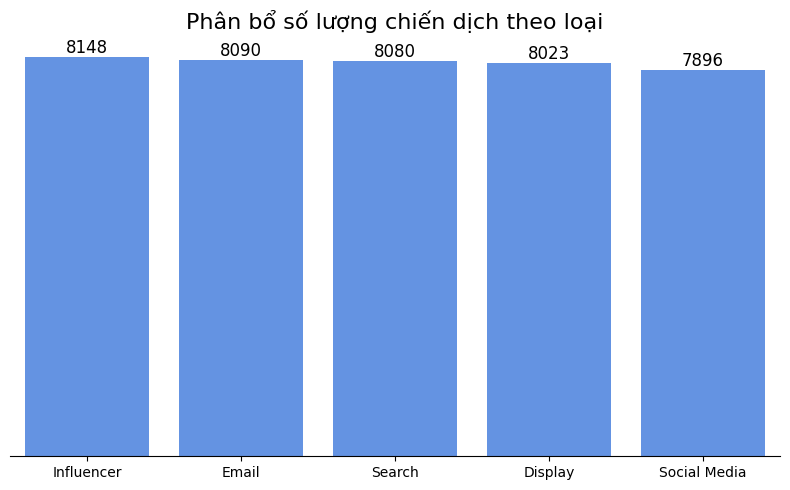

In [177]:
plt.figure(figsize=(8, 5))
order = new_df['Campaign_Type'].value_counts().index
ax = sns.countplot(data=new_df, x="Campaign_Type", color="#4F8EF7", order=order)

# Thêm tiêu đề cho biểu đồ
ax.set_title("Phân bổ số lượng chiến dịch theo loại", fontsize=16)

# Bỏ nhãn trục x và y
ax.set_xlabel("")
ax.set_ylabel("")

# Bỏ trục y
ax.yaxis.set_visible(False)

# Thêm nhãn giá trị trên mỗi cột
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

sns.despine(left=True)
plt.tight_layout()
plt.show()

Ta thấy nguồn lực phân bổ ở các kênh khá đều nhau. Tôi thấy có vẻ công ty chơi bài "an toàn", có thể là công ty đang trong giai đoạn tìm kiếm kênh đầu tư có lợi nhất. Ta cùng tiếp tục đào sâu tiếp nhé

In [178]:
# Cùng xem kênh nào có chi phí lớn nhất

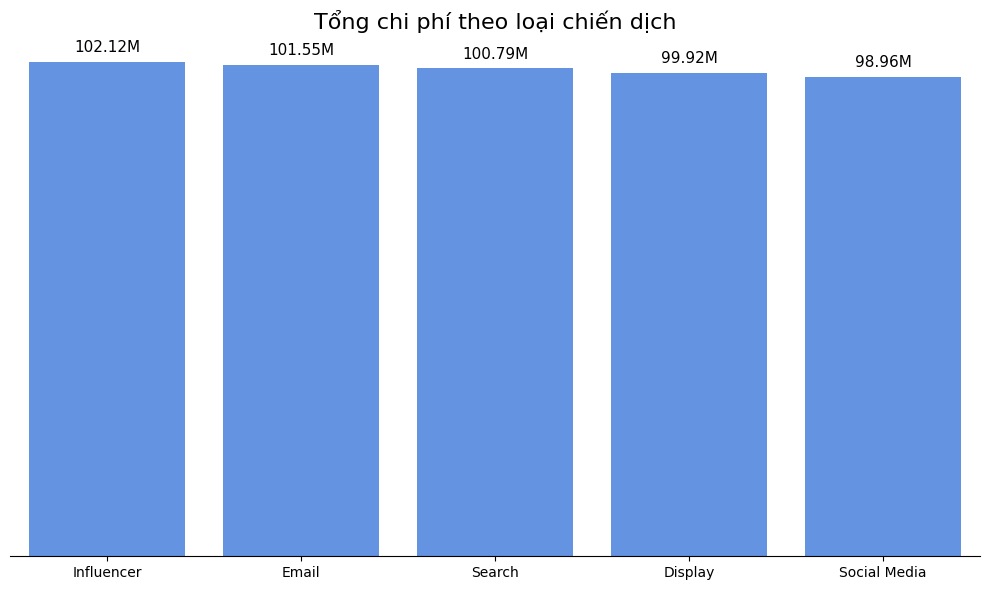

In [179]:
# Tính toán tổng chi phí theo loại chiến dịch và sắp xếp
cost_by_campaign = new_df.groupby('Campaign_Type')['Acquisition_Cost'].sum().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cost_by_campaign.index, y=cost_by_campaign.values, color="#4F8EF7")

# Thêm tiêu đề và nhãn
ax.set_title('Tổng chi phí theo loại chiến dịch', fontsize=16)
ax.set_xlabel('')

# Bỏ trục y
ax.yaxis.set_visible(False)

# Thêm nhãn giá trị trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.2f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Tinh chỉnh layout
sns.despine(left=True)
plt.tight_layout()
plt.show()


Có vẻ tổng chi phí của các chiến dịch là tỷ lệ thuận với số lượng chiến dịch.

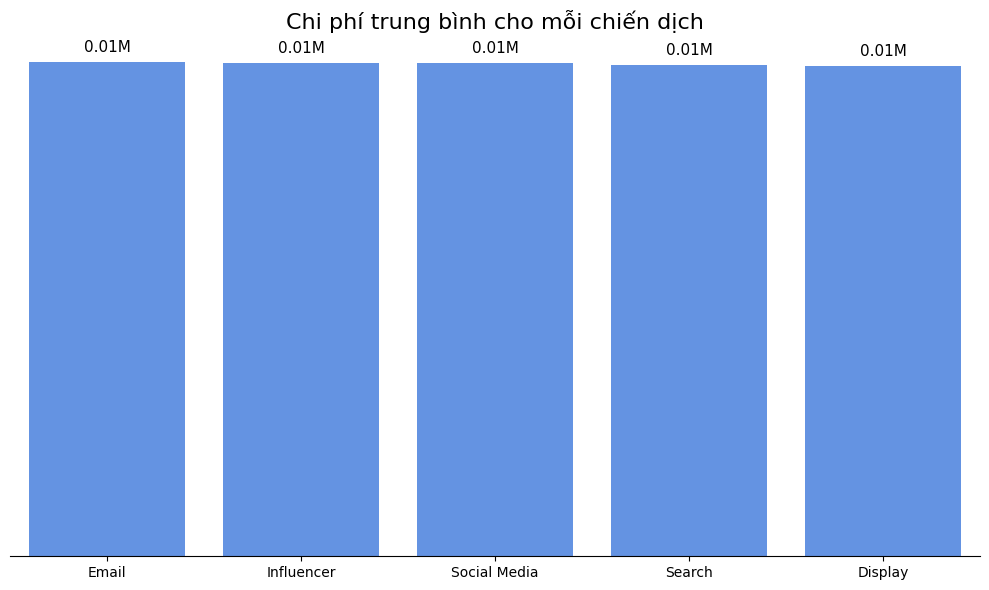

In [180]:
# Tính toán tổng chi phí theo loại chiến dịch và sắp xếp
cost_by_campaign = new_df.groupby('Campaign_Type')['Acquisition_Cost'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cost_by_campaign.index, y=cost_by_campaign.values, color="#4F8EF7")

# Thêm tiêu đề và nhãn
ax.set_title('Chi phí trung bình cho mỗi chiến dịch', fontsize=16)
ax.set_xlabel('')

# Bỏ trục y
ax.yaxis.set_visible(False)

# Thêm nhãn giá trị trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.2f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Tinh chỉnh layout
sns.despine(left=True)
plt.tight_layout()
plt.show()


Thế nhưng chi phí trung bình cho mỗi chiến dịch thì lại là bằng nhau, chứng tỏ mặc dù là có sự phân bổ mạnh ở Email hơn 1 chút so với những kênh khác thế nhưng chi phí cho mỗi lần phân bổ thì lại là như nhau. 

Có vẻ là công ty vẫn chưa dám thực sự đầu tư mạnh vào một kênh nào đó, có thể là do chưa có đủ dữ liệu để đánh giá hiệu quả của các kênh.

Ta tiếp tục đi tìm hiểu thêm:

In [181]:
# Trung bình thời gian diễn ra cho mỗi chiến dịch

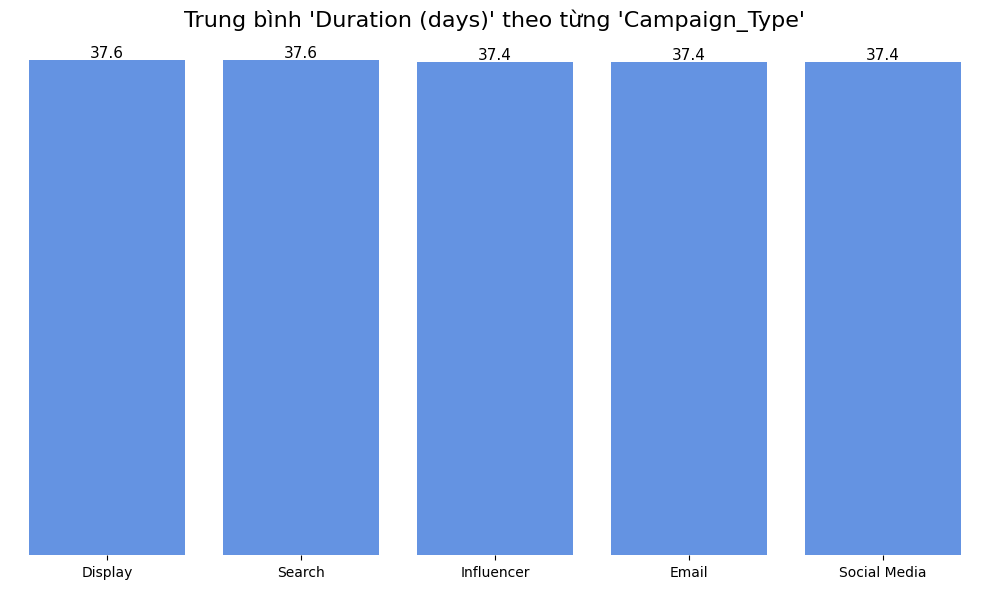

In [182]:
plt.figure(figsize=(10, 6))
durations = new_df.groupby('Campaign_Type')['Duration (days)'].mean().sort_values(ascending=False)
ax = sns.barplot(x=durations.index, y=durations.values, color="#4F8EF7")

# Thêm tiêu đề
ax.set_title("Trung bình 'Duration (days)' theo từng 'Campaign_Type'", fontsize=16)

# Bỏ nhãn trục x và y
ax.set_xlabel("")
ax.set_ylabel("")

# Bỏ trục x và y
ax.yaxis.set_visible(False)

# Thêm nhãn giá trị trên mỗi cột
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Hầu như không hề có sự khác biệt

2. Hiệu suất của từng chiến dịch ra sao ?

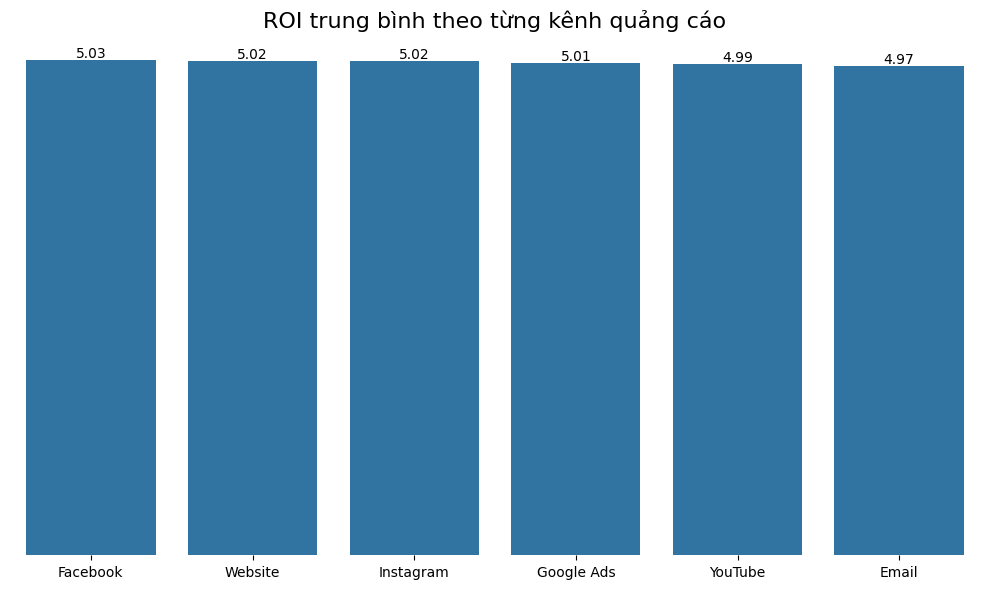

In [183]:
# ROI trên từng kênh
df_roi = new_df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_roi.index, y=df_roi.values)

ax.set_title("ROI trung bình theo từng kênh quảng cáo", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.set_visible(False)


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Các kênh có hiệu suất gần như tương đương nhau

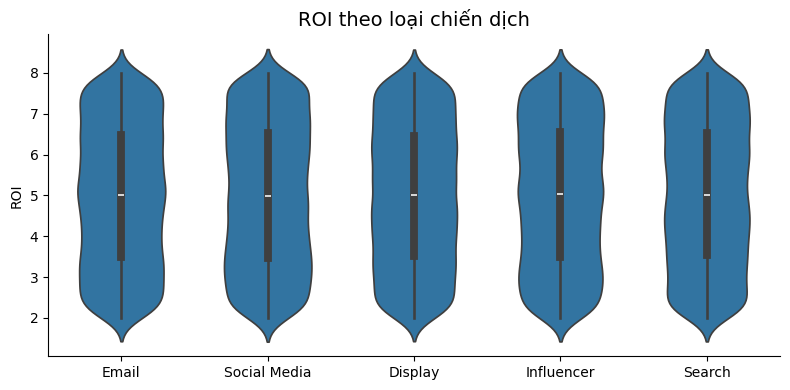

In [184]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=new_df, x='Campaign_Type', y='ROI', width=.6)
plt.title('ROI theo loại chiến dịch', fontsize=14)
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

:D Thật ngạc nhiên khi gần như không có sự khác biệt giữa các chiến dịch. Hình dáng phân phối của ROI gần như là như nhau. Dường như loại chiến dịch không có bất kỳ ảnh hưởng nào đến ROI. Và trên thực tế dữ liệu này tôi lấy trên kaggle, thế nên có thể là do người upload dữ liệu đã tạo ngẫu nhiên theo phân phối chuẩn

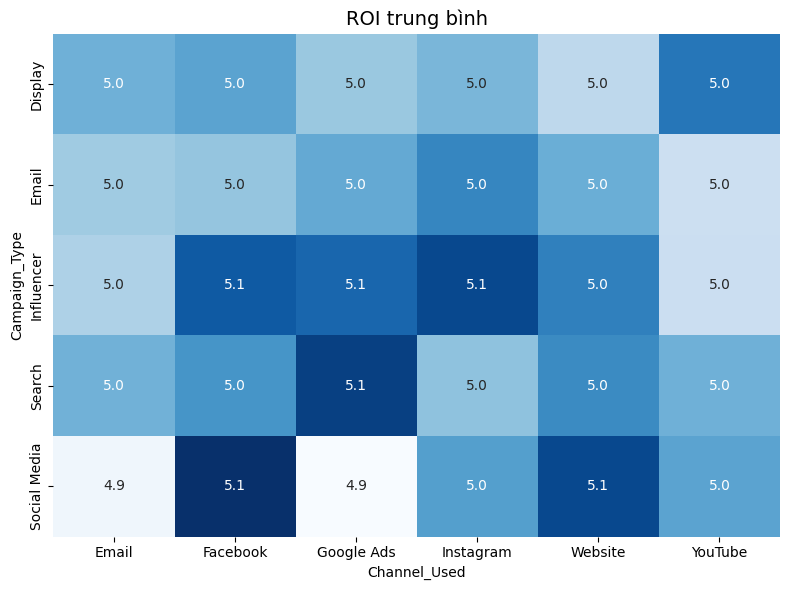

In [185]:
# ROI theo từng loại chiến dịch & kênh
roi_matrix = new_df.groupby(['Campaign_Type', 'Channel_Used'])['ROI'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(roi_matrix, annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.title('ROI trung bình', fontsize=14)
plt.tight_layout()
plt.show()

Thông thường biểu đồ này sẽ có 1 vài chỗ có giá trị khác biệt lớn so với các nơi khác. Cho ta thấy các chiến dịch khi chọn đúng kênh sẽ ra kết quả vượt trội. Tuy nhiên do đây là dữ liệu giả định (Tôi có hỏi người đăng dữ liệu rồi) nên ta thấy được ở đây rằng dường như kênh nào cũng có hiệu quả cả

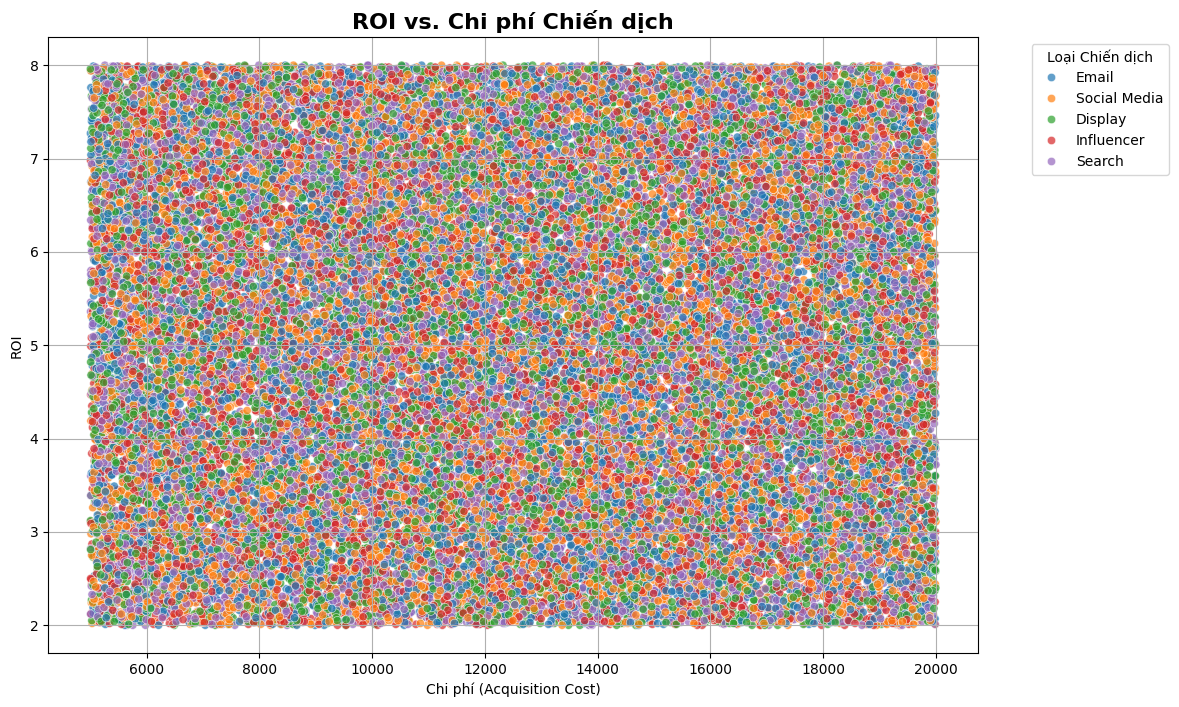

In [186]:
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ phân tán
sns.scatterplot(
    data=new_df,
    x='Acquisition_Cost',
    y='ROI',
    hue='Campaign_Type',
    sizes=(50, 500),
    alpha=0.7
)

plt.title('ROI vs. Chi phí Chiến dịch', fontsize=16, fontweight='bold')
plt.xlabel('Chi phí (Acquisition Cost)')
plt.ylabel('ROI')
plt.legend(title='Loại Chiến dịch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Dữ liệu phi thực tế nên ở đây ta nhìn ra một biểu đồ rất hỗn loạn.  
Thay vì một đám mây hỗn loạn, các chiến dịch của chúng ta lẽ ra sẽ rơi vào 4 góc phần tư chiến lược này:  
+ **Góc phần tư II**: Mỏ Vàng (ROI cao, Chi phí thấp)  
Đặc điểm: Đây là những chiến dịch hiệu quả nhất, mang lại lợi nhuận cao với ngân sách thấp.  
Hành động: Nhân rộng! Cần phân tích xem điều gì làm chúng thành công (nội dung, đối tượng, kênh?) và tìm cách nhân rộng mô hình này.  
+ **Góc phần tư I**: Ngôi Sao (ROI cao, Chi phí cao)  
Đặc điểm: Đây là những "cỗ máy kiếm tiền" chính của bạn. Chúng tốn nhiều chi phí nhưng mang lại lợi nhuận tương xứng.  
Hành động: Duy trì và tối ưu. Giữ vững vị thế của các chiến dịch này và tìm cách tăng hiệu quả để giảm chi phí mà vẫn giữ được ROI.  
+ **Góc phần tư IV**: Bò Sữa / Chó Mực (ROI thấp, Chi phí cao)  
Đặc điểm: Đây là những chiến dịch đang "đốt tiền" của bạn. Chúng tốn nhiều ngân sách nhưng không mang lại hiệu quả.  
Hành động: Cắt giảm hoặc tối ưu ngay lập tức! Cần phải xem xét lại toàn bộ chiến lược của các chiến dịch này hoặc dừng chúng lại để phân bổ ngân sách cho các "Mỏ Vàng" và "Ngôi Sao".  
+ **Góc phần tư III**: Dấu hỏi (ROI thấp, Chi phí thấp)  
Đặc điểm: Đây thường là các chiến dịch thử nghiệm. Chúng không tốn nhiều tiền nhưng hiệu quả cũng chưa cao.  
Hành động: Theo dõi và thử nghiệm. Hãy cho chúng thêm thời gian hoặc thử nghiệm các biến thể khác nhau (A/B testing) để xem liệu chúng có thể trở thành "Mỏ Vàng" trong tương lai hay không.  

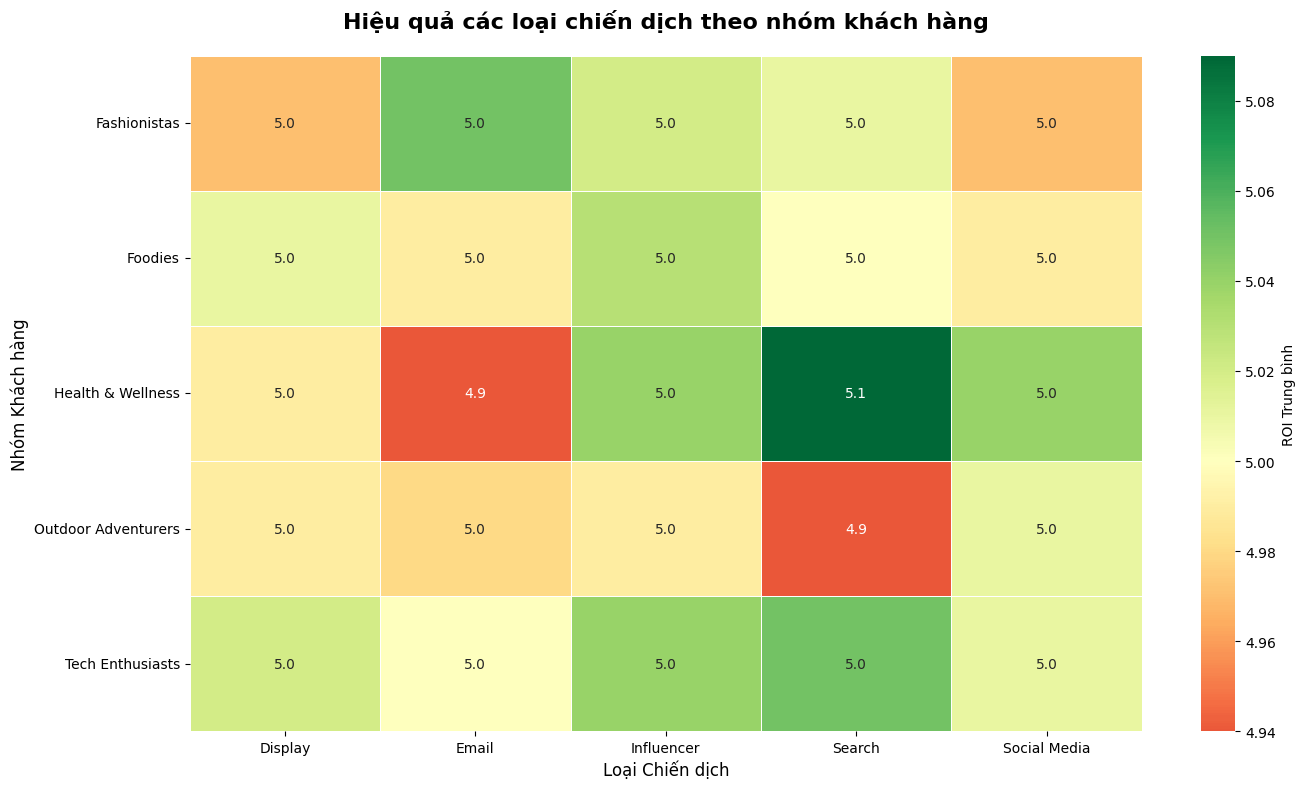

In [187]:
# Start of Selection
# Loại chiến dịch nào hiệu quả nhất với từng nhóm khách hàng ?

# Tính ROI trung bình theo từng loại chiến dịch và nhóm khách hàng
roi_by_segment_campaign = new_df.groupby(['Customer_Segment', 'Campaign_Type'])['ROI'].agg(['mean']).round(2)
roi_by_segment_campaign = roi_by_segment_campaign.reset_index()

# Tạo heatmap để dễ so sánh
plt.figure(figsize=(14, 8))
pivot_data = roi_by_segment_campaign.pivot(index='Customer_Segment', columns='Campaign_Type', values='mean')

# Vẽ heatmap với annotations
sns.heatmap(pivot_data, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=5.0,
            cbar_kws={'label': 'ROI Trung bình'},
            linewidths=0.5)

plt.title('Hiệu quả các loại chiến dịch theo nhóm khách hàng', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loại Chiến dịch', fontsize=12)
plt.ylabel('Nhóm Khách hàng', fontsize=12)
plt.tight_layout()
plt.show()

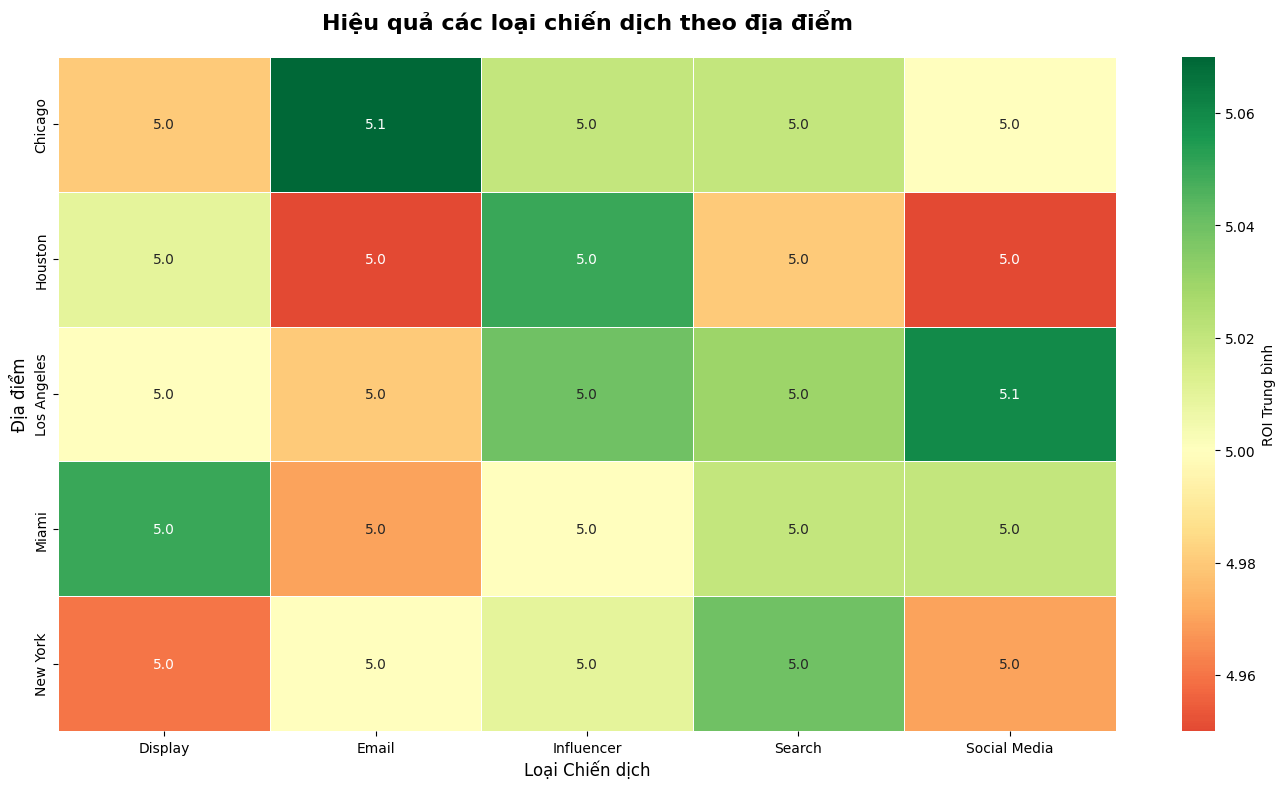

In [188]:

roi_by_segment_campaign = new_df.groupby(['Location', 'Campaign_Type'])['ROI'].agg(['mean']).round(2)
roi_by_segment_campaign = roi_by_segment_campaign.reset_index()

# Tạo heatmap để dễ so sánh
plt.figure(figsize=(14, 8))
pivot_data = roi_by_segment_campaign.pivot(index='Location', columns='Campaign_Type', values='mean')

# Vẽ heatmap với annotations
sns.heatmap(pivot_data, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=5.0,
            cbar_kws={'label': 'ROI Trung bình'},
            linewidths=0.5)

plt.title('Hiệu quả các loại chiến dịch theo địa điểm', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loại Chiến dịch', fontsize=12)
plt.ylabel('Địa điểm', fontsize=12)
plt.tight_layout()
plt.show()

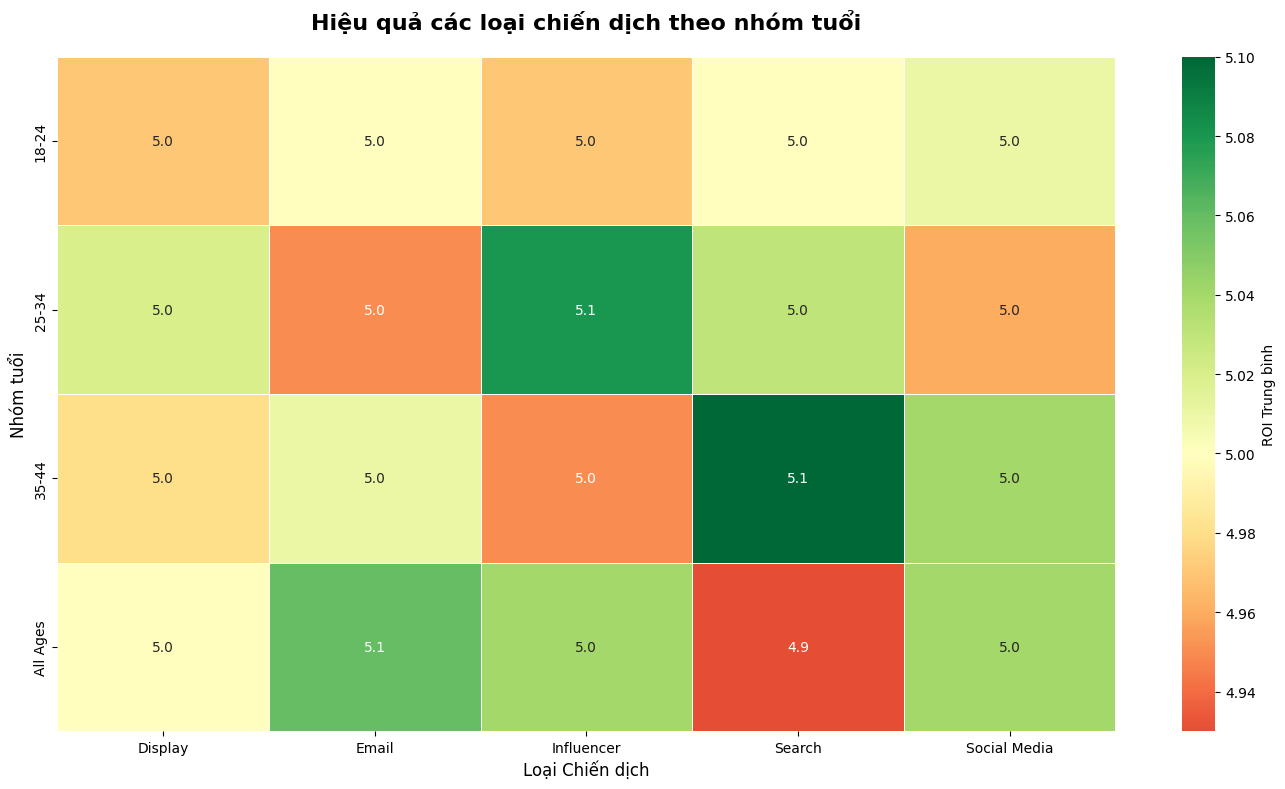

In [189]:
roi_by_segment_campaign = new_df.groupby(['Age_Group', 'Campaign_Type'])['ROI'].agg(['mean']).round(2)
roi_by_segment_campaign = roi_by_segment_campaign.reset_index()

# Tạo heatmap để dễ so sánh
plt.figure(figsize=(14, 8))
pivot_data = roi_by_segment_campaign.pivot(index='Age_Group', columns='Campaign_Type', values='mean')

# Vẽ heatmap với annotations
sns.heatmap(pivot_data, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=5.0,
            cbar_kws={'label': 'ROI Trung bình'},
            linewidths=0.5)

plt.title('Hiệu quả các loại chiến dịch theo nhóm tuổi', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loại Chiến dịch', fontsize=12)
plt.ylabel('Nhóm tuổi', fontsize=12)
plt.tight_layout()
plt.show()

In [190]:
# Xem xem khoảng thời gian dữ liệu được ghi nhận của từng campaign có giống nhau không
new_df.groupby("Campaign_Type").agg(
    min_time = ('Date', 'min'),
    max_time = ('Date', 'max')
)

,min_time,max_time
Campaign_Type,,
Display,2021-01-01,2021-12-31
Email,2021-01-01,2021-12-31
Influencer,2021-01-01,2021-12-31
Search,2021-01-01,2021-12-31
Social Media,2021-01-01,2021-12-31


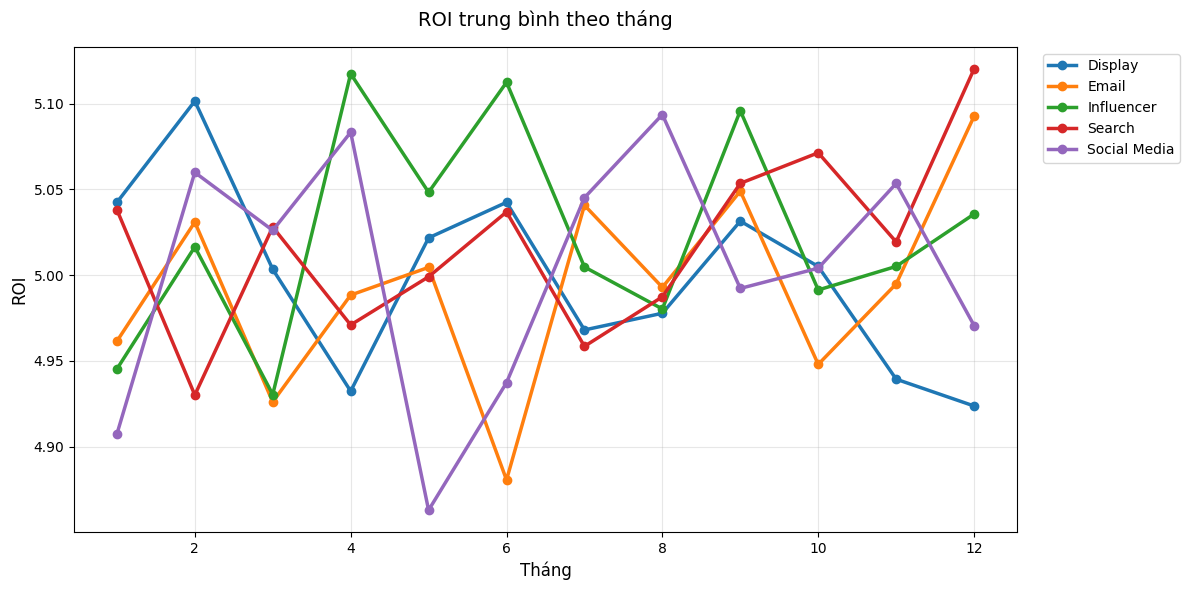

In [191]:
# ROI theo thời gian - dễ đọc
fig, ax = plt.subplots(figsize=(12, 6))

# Tính trung bình ROI mỗi tháng cho từng loại chiến dịch
monthly_roi = new_df.groupby(['Month', 'Campaign_Type'])['ROI'].mean().reset_index()

# Vẽ line chart đơn giản
for campaign in monthly_roi['Campaign_Type'].unique():
    data = monthly_roi[monthly_roi['Campaign_Type'] == campaign]
    ax.plot(data['Month'], data['ROI'], 
            marker='o', linewidth=2.5, markersize=6, label=campaign)

ax.set_title('ROI trung bình theo tháng', fontsize=14, pad=15)
ax.set_xlabel('Tháng', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Thông thường biểu đồ này sẽ giúp ta tìm được:
1. Tìm ra tính mùa vụ (ví dụ có khoảng thời gian ROI tăng vọt) vào các tháng cuối năm (có thể kỳ nghỉ lễ, mua sắm giáng sinh, năm mới)
2. Xác định xu hướng dài hạn: xem cái nào có xu hướng đi xuống rồi tìm giải pháp + phân bổ ngân sách hợp lý
3. So sánh hiệu suất: một đường năm cao hơn đường khác cho thấy kênh đó có sự tăng trưởng cao hơn các kênh khác. Mặt khác nếu kênh ổn định thì sẽ có dạng gần như đường thẳng

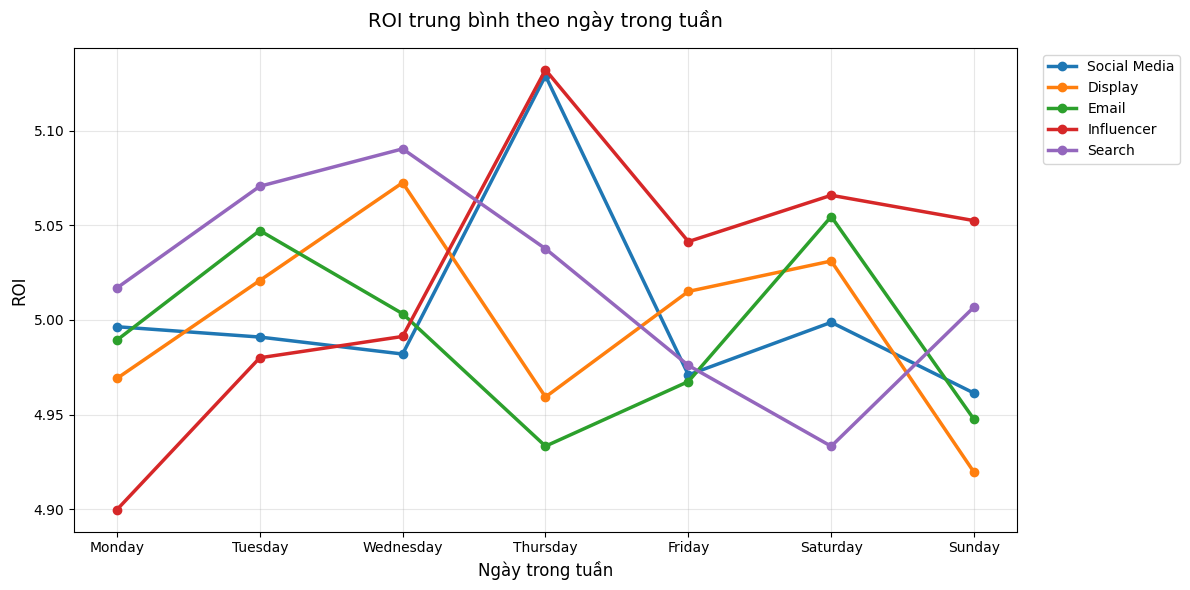

In [192]:
# ROI theo thời gian 
fig, ax = plt.subplots(figsize=(12, 6))

# Tính trung bình ROI mỗi ngày trong tuần cho từng loại chiến dịch
monthly_roi = new_df.groupby(['DayOfWeek', 'Campaign_Type'])['ROI'].mean().reset_index()

# Sắp xếp ngày trong tuần theo thứ tự hợp lý
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_roi['DayOfWeek'] = pd.Categorical(monthly_roi['DayOfWeek'], categories=day_order, ordered=True)
monthly_roi = monthly_roi.sort_values('DayOfWeek')

# Vẽ line chart đơn giản
for campaign in monthly_roi['Campaign_Type'].unique():
    data = monthly_roi[monthly_roi['Campaign_Type'] == campaign]
    ax.plot(data['DayOfWeek'], data['ROI'], 
            marker='o', linewidth=2.5, markersize=6, label=campaign)

ax.set_title('ROI trung bình theo ngày trong tuần', fontsize=14, pad=15)
ax.set_xlabel('Ngày trong tuần', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

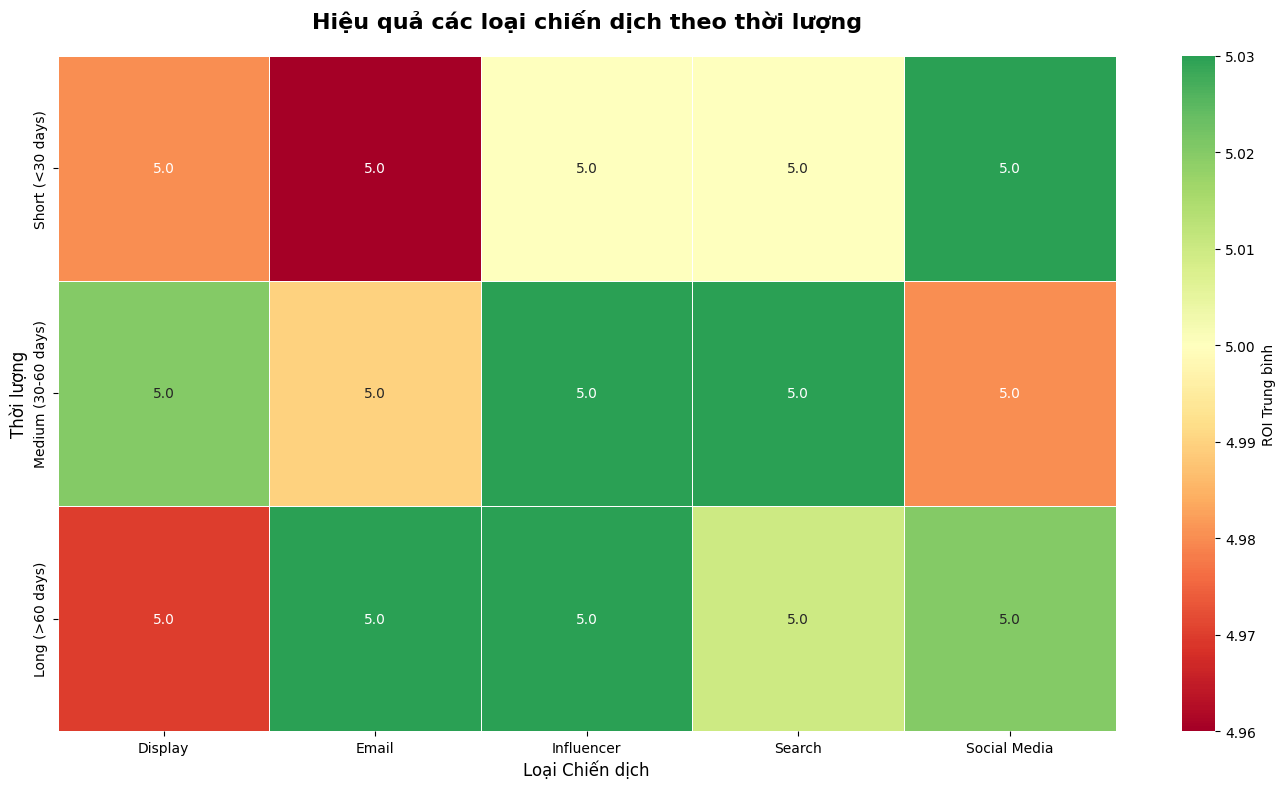

In [193]:
roi_by_segment_campaign = new_df.groupby(['Duration_Category', 'Campaign_Type'])['ROI'].agg(['mean']).round(2)
roi_by_segment_campaign = roi_by_segment_campaign.reset_index()

# Tạo heatmap để dễ so sánh
plt.figure(figsize=(14, 8))
pivot_data = roi_by_segment_campaign.pivot(index='Duration_Category', columns='Campaign_Type', values='mean')

# Vẽ heatmap với annotations
sns.heatmap(pivot_data, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=5.0,
            cbar_kws={'label': 'ROI Trung bình'},
            linewidths=0.5)

plt.title('Hiệu quả các loại chiến dịch theo thời lượng', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loại Chiến dịch', fontsize=12)
plt.ylabel('Thời lượng', fontsize=12)
plt.tight_layout()
plt.show()